<h2 align='center' style='color:purple'>Outlier detection and removal using z-score and standard deviation in python pandas</h2>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("heights.csv")
df.sample(5)

,name,height
16,donald,7.1
13,binod,6.1
5,khusbu,5.4
18,ken,23.2
1,maria,2.3


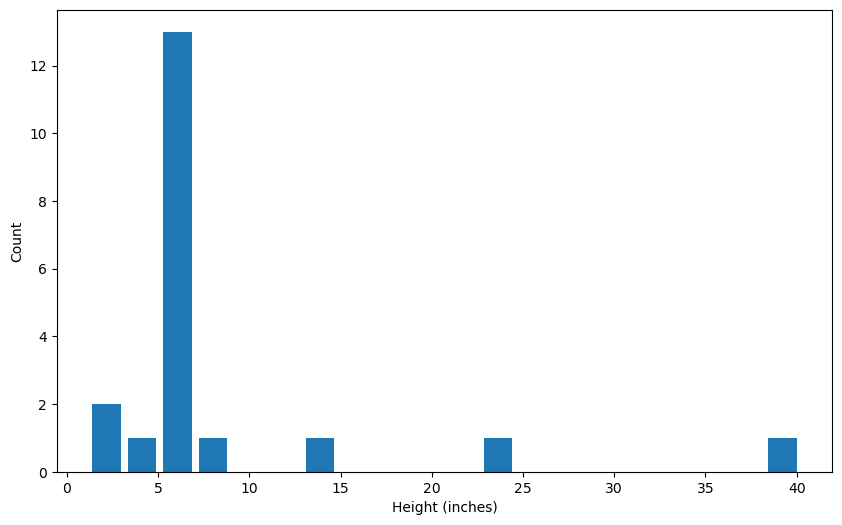

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

**Plot bell curve along with histogram for our dataset**

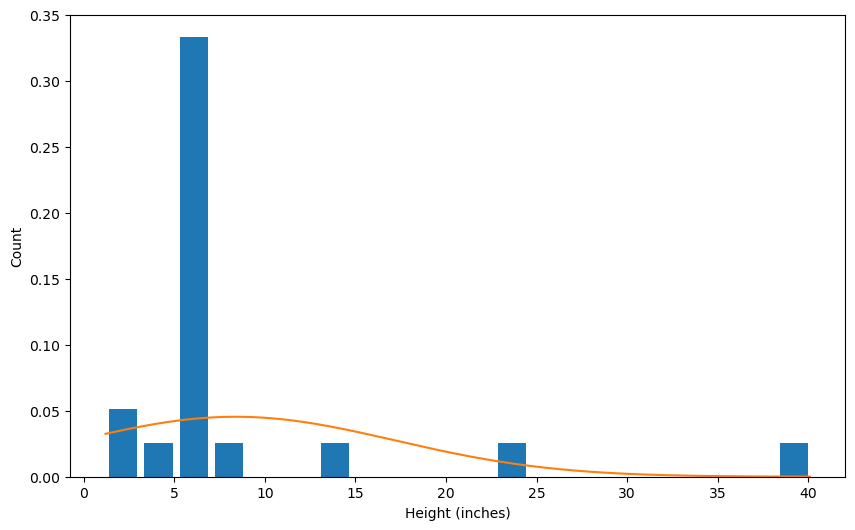

In [4]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [5]:
df.height.mean()

8.39

In [6]:
df.height.std()

8.782812162040369

Here the mean is 66.37 and standard deviation is 3.84. 

<h3 style='color:blue'>(1) Outlier detection and removal using 3 standard deviation</h3>

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [7]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

34.7384364861211

In [8]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

-17.958436486121105

Here are the outliers that are beyond 3 std dev from mean

In [9]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,name,height
19,Liu,40.2


Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points.
Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

**Now remove these outliers and generate new dataframe**

In [10]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [11]:
df_no_outlier_std_dev.shape

(19, 2)

In [12]:
df.shape

(20, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

**Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [13]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,name,height,zscore
0,mohan,1.2,-0.818644
1,maria,2.3,-0.693400
2,sakib,4.9,-0.397367
3,tao,5.1,-0.374595
4,virat,5.2,-0.363209


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [14]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [15]:
df[df['zscore']>3]

,name,height,zscore
19,Liu,40.2,3.621847


In [16]:
df[df['zscore']<-3]

,name,height,zscore


Here is the list of all outliers 

In [17]:
df[(df.zscore<-3) | (df.zscore>3)]

,name,height,zscore
19,Liu,40.2,3.621847


<h3 style='color:purple'>Remove the outliers and produce new dataframe</h3>

In [18]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,name,height,zscore
0,mohan,1.2,-0.818644
1,maria,2.3,-0.693400
2,sakib,4.9,-0.397367
3,tao,5.1,-0.374595
4,virat,5.2,-0.363209


In [19]:
df_no_outliers.shape

(19, 3)

In [20]:
df.shape

(20, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 